# Análise de dados do ENEM 2016

Autor: Álvaro Queiroz

Neste notebook serão apresentados e explorados os dados do ENEM 2016 contidos em um conjunto de dados que pode ser encontrado no site Kaggle https://www.kaggle.com/davispeixoto/codenation-enem2

O Exame Nacional do Ensino Médio (ENEM) é uma prova realizada pelo Instituto Nacional de Estudos e Pesquisas Educacionais Anísio Teixeira (INEP). Ela é utilizada para avaliar a qualidade do ensino médio no país. Seu resultado serve para acesso ao ensino superior em universidades públicas brasileiras, através do Sistema de Seleção Unificada (SiSU), assim como em algumas universidades no exterior.

Este dataset está separado em 2 conjuntos de dados, um conjunto de treinamento e outro conjunto de testes, essa separação de dados é feita com o fim de criar modelos com o conjunto de treinamento e testar esses modelos com o conjunto de testes, entretanto, neste notebook será feita apenas exploração dos dados, portanto os 2 conjuntos de dados serão fundidos.

![enem](https://user-images.githubusercontent.com/23335136/55671119-da0f8400-5862-11e9-8b89-97432af4932f.jpg)

No ENEM 2016, houveram 9.276.328 incritos, a abstenção foi de 30%. Esse conjunto de dados conta com 18.306 entradas o que equivale a aproximadamente 0.2% dos dados totais. 

A primeira coisa a se fazer é importar bibliotecas e funções necessárias, para diminuir a quantidade de código neste notebook, algumas funções foram implementadas no arquivo plothelper.py e serão chamadas diretamente neste notebook

### Observação: Caso o seu interesse seja apenas nos resultados e gráficos, não leia as caixas como essa abaixo, elas contém apenas os códigos que geram os gráficos

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import plothelper
from plothelper import plotCorrelationMatrix, plotBar

Precisamos carregar os dados nos dois arquivos 'train.csv' e 'test.csv' e juntar em um único dataframe para fazer as análises

In [2]:
nRowsRead = None
dft = pd.read_csv('train.csv', delimiter=',', nrows = nRowsRead)
dft.dataframeName = 'train.csv'
dftr = pd.read_csv('test.csv', delimiter=',', nrows = nRowsRead)
dftr.dataframeName = 'test.csv'
df = dft.append([dftr],sort=True)
nRow, nCol = df.shape
print(f'Dataframe com {nRow} linhas e {nCol} colunas')

Dataframe com 18306 linhas e 167 colunas


Os dados possuem 18.306 entradas e 167 colunas, cada uma dessas colunas contém uma informação sobre cada um dos 18.306 participantes

Vamos calcular a porcentagem de candidatos que não compareceram à prova de redação, caso o número seja muito diferente da abstenção anunciada pelo governo, poderemos concluir que os dados deste dataset foram amostrados de forma enviesada, o que tornaria esses dados inúteis para análises estatísticas

In [21]:
print('Neste dataset a porcentagem de participantes que não fez a prova de redação foi : %.2f '
% (df.NU_NOTA_REDACAO.isna().sum()/nRow *100))

Neste dataset a porcentagem de participantes que não fez a prova de redação foi : 26.20 


A abstenção anunciada na mídia foi 30%, isso é um indício de que o dataset pode ter sido amostrado aleatóriamente, ou seja, os dados parecem não ter sido selecionados de forma tendenciosa, mas isso apenas não é evidência suficiente.

Continuando, este dataset possui 167 colunas, essas colunas em sua maioria são valores que não nos interessam para análise, são valores como número de inscrição e código da escola, por isso criaremos outro dataframe com apenas informações que nos interessam, entre elas, nota em ciências humanas (NU_NOTA_CN), sexo do candidato (TP_SEXO), se o candidato possui déficit de anteção (IN_DEFICIT_ATENCAO) entre outros, o código e significado de cada coluna pode ser visto no arquivo Dicionrio_Microdados_Enem_2016

In [4]:
df = df[['NU_NOTA_CN', 'NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO',
         'NO_MUNICIPIO_RESIDENCIA','SG_UF_RESIDENCIA','NU_IDADE','TP_SEXO','TP_COR_RACA','TP_ESCOLA',
         'IN_DEFICIT_ATENCAO','IN_DISLEXIA']].copy()
nRow, nCol = df.shape
print(f'Dataframe com {nRow} linhas e {nCol} colunas')

Dataframe com 18306 linhas e 13 colunas


## Características básicas dos participantes

Primeiro vamos levantar algumas estatísticas básicas sobre os participantes do exame para poder avaliar as notas em um contexto com maior quantidade de informação.

Primeiro, o sexo dos participantes

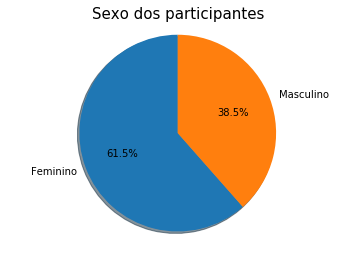

In [5]:
labels = ['Feminino' , 'Masculino']
sizes = [df['TP_SEXO'].value_counts()[0]/nRow, df['TP_SEXO'].value_counts()[1]/nRow]
fig1, ax1 = plt.subplots()
plt.title(f'Sexo dos participantes', fontsize=15)
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

A porcentagem de participantes do sexo feminino é superior à do sexo masculino, isso era de se esperar porque na população do Brasil existem mais mulheres do que homens (51.5%), entretanto apenas essa diferença na proporção na população do Brasil não é o bastante para explicar essa discrepância tão alta.

Segundo o IBGE, tomando por base a população de 25 anos ou mais de idade com Ensino Superior completo em 2016, as mulheres somam 23,5%, e os homens, 20,7%, portanto essa discrepância persiste no ensino superior.

No questionário de inscrição, os participantes deveriam preencher qual o tipo de escola onde eles estudavam ou estudaram

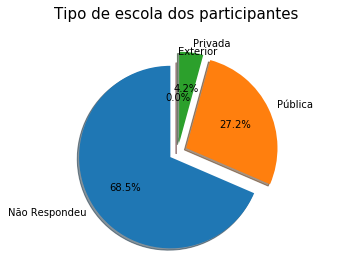

In [6]:
labels = ['Não Respondeu', 'Pública', 'Privada', 'Exterior']
sizes = []
for i in range(1,5):
    sizes.append(df.TP_ESCOLA.value_counts()[i]/nRow)
explode = (0.1, 0.1, 0.1, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.title(f'Tipo de escola dos participantes \n', fontsize=15)
plt.show()

Infelizmente, a maioria dos alunos prefere não responder a essa pergunta, isso pode invalidar outras análises estatísticas, porque talvez alguns grupos de alunos estejam mais dispostos a responder a essa pergunta do que outros, e isso introduz viés aos dados porque alguns grupos podem ficar super-representados e outros pouco representados nos dados. Esse problema fica evidente na hora de comparar as notas médias entre alunos de escolas públicas e escolas privadas.

Vamos ver em quais estados os participantes residem

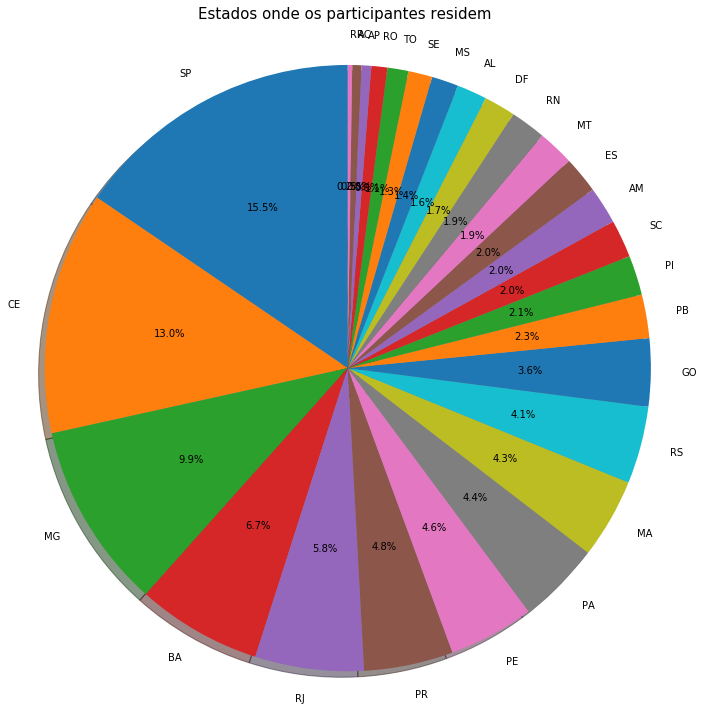

In [7]:
labels = ['SP','CE','MG','BA','RJ','PR','PE','PA','MA','RS','GO','PB','PI','SC','AM',
          'ES','MT','RN','DF','AL','MS','SE','TO','RO','AP','AC','RR']
sizes = []
for i in range(0,27):
    sizes.append(df.SG_UF_RESIDENCIA.value_counts()[i]/nRow)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
fig = plt.gcf()
plt.title(f'Estados onde os participantes residem \n', fontsize=15)
fig.set_size_inches(12,12)
plt.show()

Neste gráfico, pode-se notar algumas curiosidades,

O Ceará é o oitavo estado mais populoso do Brasil mas é o segundo estado com maior quantidade de participantes no ENEM. Isso, é claro, é resultado de políticas públicas, em uma rápida pesquisa, foi possível encontrar várias notícias que descrevem as medidas que o governo do estado toma para aumentar a participação dos alunos do estado no ENEM, principalmente alunos de famílias carentes - https://ultimosegundo.ig.com.br/educacao/2017-05-05/governo-do-ceara-dara-bolsa-para-quem-fizer-enem.html governo pode dar dinheiro à candidatos que tenham bom desempenho no ENEM.

São Paulo, apesar de ser o estado com maior população do Brasil, não está representado proporcionalmente na população de participantes do ENEM, cerca de 30% da população do Brasil vive no estado. Isso pode ser consequência de o acesso às universidades estaduais de São Paulo se dar principalmente por seus vestibulares (em 2016, pelo menos), por isso o ENEM não vai ser atrativo para alguns estudantes paulistas.

outras

Utilizaremos um histograma para analisar a idade dos participantes

A idade mais comum de um participante é :  17


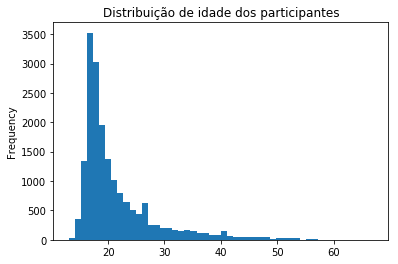

In [8]:
df['NU_IDADE'].plot.hist(bins=50,title='Distribuição de idade dos participantes')
print("A idade mais comum de um participante é : ",df['NU_IDADE'].value_counts().idxmax())


A distribuição de idades dos participantes lembra uma distribuição de Poisson ou log-normal, é possíver ver que após o pico em 17 anos a frequência cai rapidamente para zero com o aumentar de idades, ou seja, a maioria dos participantes realmente está terminando o ensino médio ou terminou a pouco tempo mas continua fazendo o exame, provavelemente para usar a nota para entrar no ensino superior.

Há um pico anômalo em aproximadamente 25 anos, esse pico poderia ser causado por participantes fazendo o ENEM para ter acesso à universidades pelo SISU ou PROUNI para uma segunda graduação.

## Análise das notas de grupos de participantes

Nos questionários que os participantes do ENEM tem que responder para realizar as inscrições, o MEC pede várias informações que podem ser usadas para agrupar esses participantes, as notas para cada teste (Ciências humanas, linguagens,..,etc) de cada grupo será mostrada a seguir.

Primeiro faremos isso para participantes do sexo masculino e do sexo feminino, a primeira coisa a se fazer é criar um dataframe para cada um dos grupos, depois 2 gráficos de barras serão gerados chamando a função plotBar contida no arquivo plothelper.py

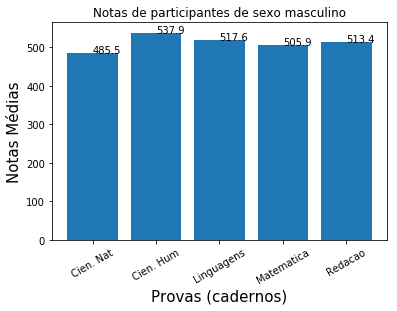

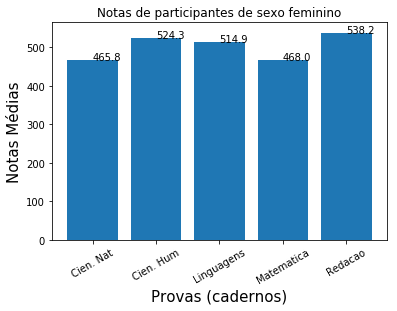

In [9]:
label = ['Cien. Nat', 'Cien. Hum','Linguagens','Matematica','Redacao']

maledf = df[df.TP_SEXO=='M']
plotBar(label,[maledf.NU_NOTA_CN.mean().round(1),
              maledf.NU_NOTA_CH.mean().round(1),
              maledf.NU_NOTA_LC.mean().round(1),
              maledf.NU_NOTA_MT.mean().round(1),
              maledf.NU_NOTA_REDACAO.mean().round(1)],
              'Notas de participantes de sexo masculino')

femaledf = df[df.TP_SEXO=='F']
plotBar(label,[femaledf.NU_NOTA_CN.mean().round(1),
              femaledf.NU_NOTA_CH.mean().round(1),
              femaledf.NU_NOTA_LC.mean().round(1),
              femaledf.NU_NOTA_MT.mean().round(1),
              femaledf.NU_NOTA_REDACAO.mean().round(1)],
              'Notas de participantes de sexo feminino')

del maledf
del femaledf

É possível observar que os participantes do sexo masculino tem médias superiores em 4 provas, ciências naturais, ciências humanas, linguagens e matemática, as diferenças são, CN: 19.7 pts, CH: 13.6 pts, LG: 2.7 pts e MT: 37.9 pts.

As participantes do sexo feminino tem média superior na prova de redação, 24.8 pts acima.

Apontar as causas dessas diferenças de desempenho pode ser complicado devido a complexidade do problema, a causa é provavelmente complexa e multivariável, significando que provavelmente não é apenas um fator, mas uma combinação de fatores, o mesmo pode ser dito para os próximos 2 gráficos, que apresentam diferenças entre notas de participantes de grupos de cor/raça e escolas diferentes.

A maior diferença de desempenho está em matemática, esse problema não é exclusividade do Brasil, mas internacional. Algumas medidas e políticas vem sendo implementadas para mitigar o problema.
Em especial, existem vários esforços para atrair mais mulheres para carreiras como engenharia e ciências da computação https://en.wikipedia.org/wiki/Women_in_STEM_fields

Agora teremos a comparação entre as notas de participantes que se auto-declararam de cor/raça branca e de participantes que se auto-declararam de cor/raça preta.

Na hora da inscrição, existem 6 opções, inclusive a opção de não declarar, diferentemente de sexo e por isso os resultados do gráfico anterior são, de certa forma, mais confiáveis.

Aqui apenas as duas cores/raças serão comparadas por 2 motivos:

1 - Esses dados podem ser relevantes para a discussão sobre cotas raciais (em universidades, concursos e etc)

2 - Esse notebook já é longo o bastante

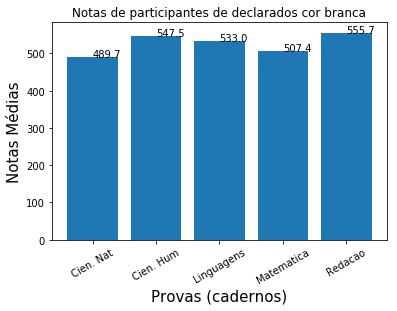

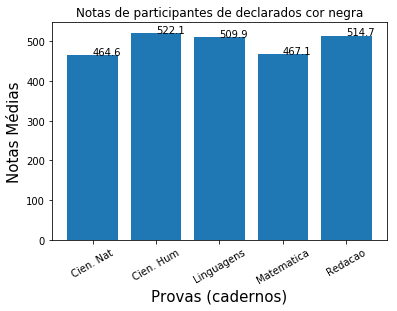

In [11]:
brancdf = df[df.TP_COR_RACA==1]
plotBar(label,[brancdf.NU_NOTA_CN.mean().round(1),
              brancdf.NU_NOTA_CH.mean().round(1),
              brancdf.NU_NOTA_LC.mean().round(1),
              brancdf.NU_NOTA_MT.mean().round(1),
              brancdf.NU_NOTA_REDACAO.mean().round(1)],
              'Notas de participantes que declaram  cor/raca branca')

negrdf = df[df.TP_COR_RACA==2]
plotBar(label,[negrdf.NU_NOTA_CN.mean().round(1),
              negrdf.NU_NOTA_CH.mean().round(1),
              negrdf.NU_NOTA_LC.mean().round(1),
              negrdf.NU_NOTA_MT.mean().round(1),
              negrdf.NU_NOTA_REDACAO.mean().round(1)],
              'Notas de participantes que declaram cor/raca negra')

del brancdf
del negrdf

As notas médias de participantes que se declararam de cor/raça branca são maiores em todas as provas, mas como veremos no próximo gráfico, essas discrepâncias são menores que a discrepância entre participantes de escolas públicas e privadas, como existe uma maioria branca em escolas privadas, esse poderia ser um dos fatores que contribuiu para a discrepância (fontes e dados).

http://agenciabrasil.ebc.com.br/educacao/noticia/2016-11/educacao-reforca-desigualdades-entre-brancos-e-negros-diz-estudo

Por último, o agrupamento será por tipo de escola do participante, entretanto como foi explicado anteriormente, esses dados estão muito provavelmente enviesados e não devem ser levados muito a sério em análises e generalisações.

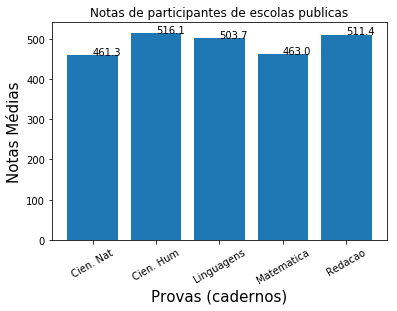

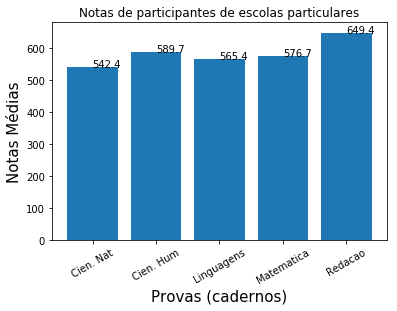

In [10]:
pubdf = df[df.TP_ESCOLA==2]
plotBar(label,[pubdf.NU_NOTA_CN.mean().round(1),
              pubdf.NU_NOTA_CH.mean().round(1),
              pubdf.NU_NOTA_LC.mean().round(1),
              pubdf.NU_NOTA_MT.mean().round(1),
              pubdf.NU_NOTA_REDACAO.mean().round(1)],
              'Notas de participantes de escolas publicas')

partdf = df[df.TP_ESCOLA==3]
plotBar(label,[partdf.NU_NOTA_CN.mean().round(1),
              partdf.NU_NOTA_CH.mean().round(1),
              partdf.NU_NOTA_LC.mean().round(1),
              partdf.NU_NOTA_MT.mean().round(1),
              partdf.NU_NOTA_REDACAO.mean().round(1)],
              'Notas de participantes de escolas particulares')

del pubdf
del partdf

Como pode ser visto, essa é a categoria com maior discrepância entre as notas, entretanto esses dados muito provavelmente não correspodem aos valores reais

outros



## Análise das notas das provas

A primeira coisa a se analisar nas notas de todos os candidatos é a nota média em cada prova

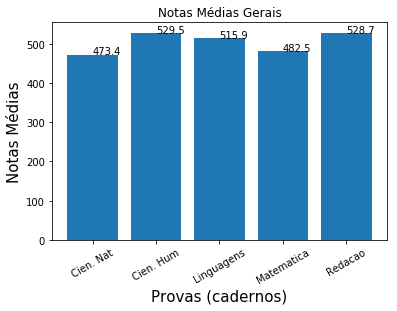

In [30]:
plotBar(label,[df.NU_NOTA_CN.mean().round(1),
              df.NU_NOTA_CH.mean().round(1),
              df.NU_NOTA_LC.mean().round(1),
              df.NU_NOTA_MT.mean().round(1),
              df.NU_NOTA_REDACAO.mean().round(1)],
              'Notas Médias Gerais')

A nota média mais baixa ocorre em Ciências Naturais, seguida por matemática.
É possível notar um padrão de notas mais baixas em ciências exatas (CN é 66% ciências exatas), e como foi mostrado anteriormente, esse padrão é acentuado em participantes do sexo feminino.
As 2 notas mais altas estão bem próximas, são as notas de Redação e Ciências Humanas.

Para avaliar a distrubuição das notas, podems utilizar histogramas

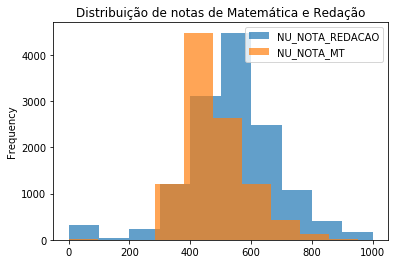

In [23]:
df['NU_NOTA_REDACAO'].plot.hist(bins = 10, alpha=0.7,
                                title='Distribuição de notas de Matemática e Redação',
                                legend=True)
plot1 = df['NU_NOTA_MT'].plot.hist(bins = 10, alpha=0.7,legend=True)



Inicialmente, as notas parecem ter distrubuições parecidas, mas médias diferentes (as médias são essas mostradas no gráfico de barras anterior).
A nota da redação é atribuida por corretores humanos, entretanto, a distribuição de notas parece ser consistente com outras notas onde a correção é feita de forma automática por um computador.

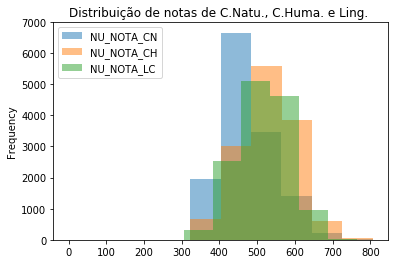

In [31]:
df['NU_NOTA_CN'].plot.hist(bins = 10, alpha=0.5,
                                title='Distribuição de notas de C.Natu., C.Huma. e Ling. ',
                                legend=True)
df['NU_NOTA_CH'].plot.hist(bins = 10, alpha=0.5,legend=True)
plot2 = df['NU_NOTA_LC'].plot.hist(bins = 10, alpha=0.5,legend=True)

Nesse gráfico pode-se notar dois extremos nas notas do exame, a nota de ciências naturais com a menor média de todas as provas, concentra grande quantidade de notas no intervalo 400-500. As notas de ciências humanas e linguagens estão mais distribuidas, isso significa que as notas de ciências naturais tem uma variância pequena comparada a essas de ciências humanas e linguagens.

Para analisar as notas para cada estado, usaremos gráficos do tipo scatter para as notas de redação e matemática, deve-se ter em mente que esse tipo de gráfico irá evidenciar estados com maior quantidade de candidatos.

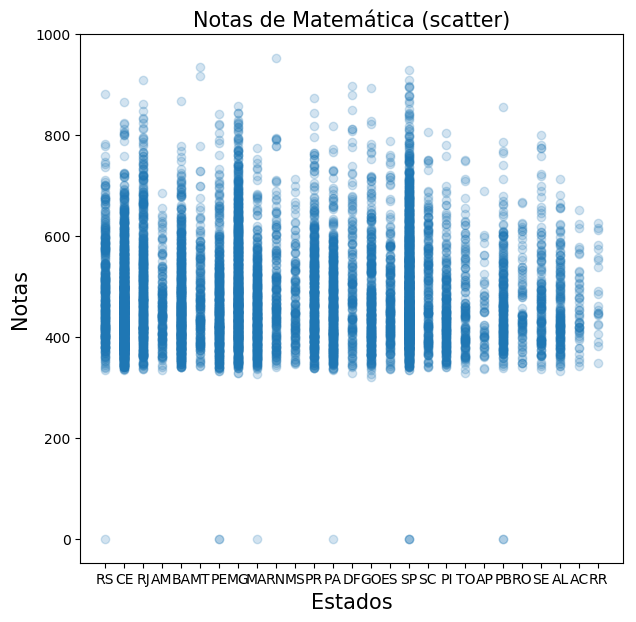

In [35]:
plt.figure(figsize=(7, 7), dpi=100)
plt.title(f'Notas de Matemática (scatter)', fontsize=15)
plt.xlabel('Estados', fontsize=15)
plt.ylabel('Notas', fontsize=15)
plot = plt.scatter(df['SG_UF_RESIDENCIA'],df['NU_NOTA_MT'],alpha=0.2)

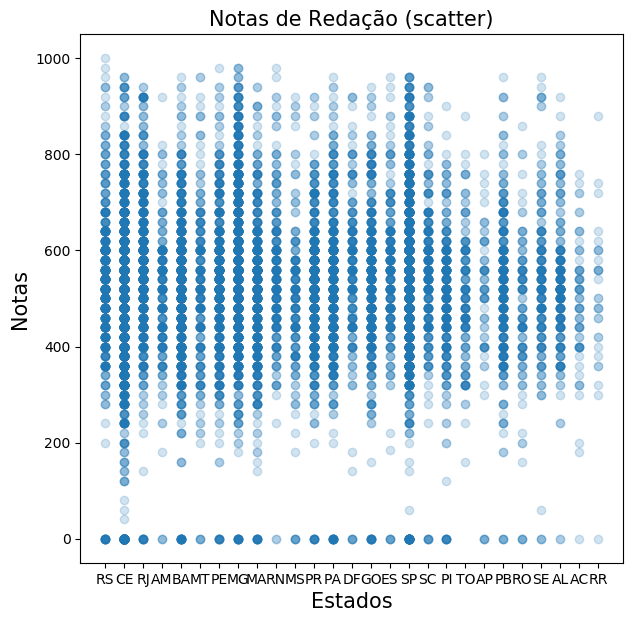

In [27]:
plt.figure(figsize=(7, 7), dpi=100)
plt.title(f'Notas de Redação (scatter)', fontsize=15)
plt.xlabel('Estados', fontsize=15)
plt.ylabel('Notas', fontsize=15)
plot =  plt.scatter(df['SG_UF_RESIDENCIA'],df['NU_NOTA_REDACAO'],alpha=0.2,label='curPerform')


Nesse gráfico fica evidente a forte natureza discreta das notas de redação, onde para cada competência são dadas notas discretas, ex 200: exelente, 160 bom, etc. ver: http://download.inep.gov.br/educacao_basica/enem/guia_participante/2018/manual_de_redacao_do_enem_2018.pdf

Além disso, as notas de redação têm a maior variância entre todas as provas, como pode ser visto no primeiro histograma com as notas.

É um pouco arriscado tirar conclusões sobre as diferenças de desempenho dos estados, isso porque o scatter irá evidenciar mais os estados com maior quantidade de inscritos, i.e. São Paulo, Minas Gerais e Ceará.
[todo] normalizar scatter para quantidade de pontos entre estados

outros

## Matriz de correlação dos dados

A matriz de correlação mostra os valores de correlação de Pearson, que medem o grau de relação linear entre cada par de itens ou variáveis. Os valores de correlação podem variar entre -1 e +1.

Quando duas variáveis A e B possuem correlação positiva, isso significa que caso seja observado um aumento em A, provavelemnte iremos observar um aumento em B.

Quando duas variáveis A e B possuem correlação negativa, isso significa que caso seja observado um aumento em A, provavelemnte iremos observar um decremento em B.

A matriz de correlação é simétrica na diagona principal porque a correlação de A e B é igual a correlação de B e A, corr(A,B) = corr(B,A).

As correlações na diagonal principal são todas igual 1, porque corr(A,A) = 1

A função que cria a matriz de correlação chamada está no arquivo plothelper.py

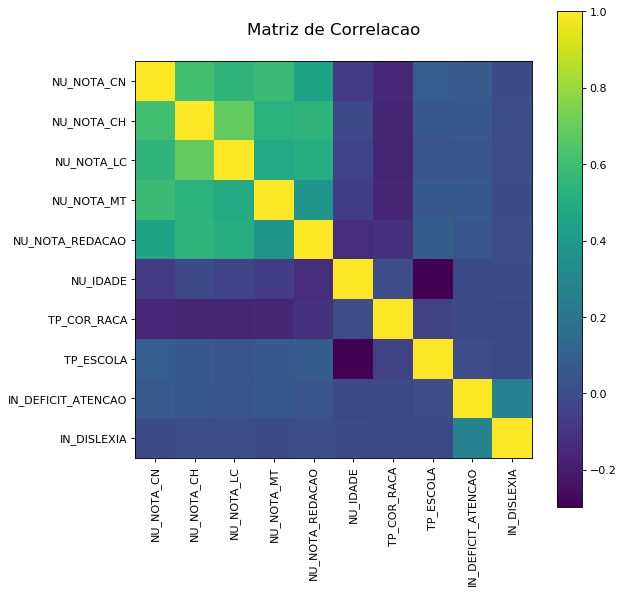

In [15]:
plot = plotCorrelationMatrix(df, 8)

Analisando a matriz de correlação de dados, é possível observar que todas as notas possuem correlação positiva,  isso significa que um aluno que vai bem em uma matéria provavelmente irá bem nas outras.

Dentre as correlações de notas, a mais forte é a correlação entre as notas de ciências humanas e linguagens e a mais fraca é observada entre redação e matemática, isso signica que ao se observar um participante com boa nota em linguagens, é altamente provável que ele também terá boa nota em ciências humanas, entretanto o mesmo não pode ser dito com tanta certeza ao se tentar prever o desempenho na prova de redação com base na nota de matemática de um aluno.

A nota de redação tem maior correlação com a nota de ciências humanas e não com linguagens. As provas de ciências humanas do ENEM costumam abordar temas atuais e às vezes inusitados em questões, pode-se argumentar que o mesmo ocorre no tema da redação, pode-se então explicar essa correlação através do alinhamento entre as duas provas.

Também é possível perceber que a idade tem fraca correlação com as notas e, apesar de ainda fraca, a correlação mais forte é com ciências humanas

outros

# Conclusão

Esse notebook estuda o conjunto de dados utilizado, e não é possível afirmar com confiança que as estatísticas apresentas aqui serão vistas em um estudo com a população total (o conjunto de dados completos, todos os participantes) e muito menos a população total de pessoas que cursaram o ensino médio. Entretanto, os dados apresentam estatísticas razoáveis.

outros